# forTEXT-Lerneihneit word2vec

Diese Lerneinheit zeigt Ihnen schrittweise, wie Sie mit Gensim ein word2vec-Modell erstellen, Abfragen ausführen und Visualisierungen erhalten können. Vor jeder Code-Zeile finden Sie eine kurze Erklärung des nächsten Schrittes. Innerhalb der Code-Boxen finden Sie zum Teil Kommentare, die mit # als solche gekennzeichnet sind. In diesen Kommentaren finden Sie Erklärungen zu einzelnen Aspekten des Codes.

Klicken Sie nun in die nächste Zeile, sodass ihr Cursor dort erscheint. Klicken Sie dann oben im Menü auf "Run", damit Ihnen Ergebnisse direkt unterhalb der Code-Zeilen in diesem Notebook angezeigt werden. Sobald in den eckigen Klammern links eine Zahl erscheint, wissen Sie, dass der Arbeitsschritt vom Computer abgeschlossen wurde. Wenn ein Schritt etwas länger dauert, so erscheint in den eckigen Klammern ein Asterisk (*). Sie erkennen daran, dass Ihr Computer einen Vorgang noch nicht abgeschlossen hat.

In [1]:
%matplotlib inline

## Die Basis-Einstellungen laden

Klicken Sie nun in die nächste Zeile, sodass Ihr Cursor dort erscheint. Um die Basiseinstellungen zu laden, klicken Sie dann oben im Menü auf "Run". Die Basiseinstellungen bedeuten, dass die Vektorgröße bei 100 Dimensionen liegt und dass von einem Wort immer 5 Wörter, die davor und 5 Wörter, die danach stehen als Kontext berücksichtigt werden. Außerdem werden die Wörter so umgeschrieben, dass im gesamten Korpus nur noch Kleinbuchstaben vorkommen (lowercasig). Mehr über die Standardeinstellungen für word2vec in Gensim erfahren Sie im Methodenbeitrag (Schumacher und Uglanova 2022: https://fortext.net/routinen/methoden/word2vec).  

In [2]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import glob
import os
import nltk

## Gensim laden

Im nächsten Schritt werden wir zwei Dinge laden:

1. Das Gensim-Package
2. Das im eigenen Ordnersystem abgelegte Textkorpus

Bitte ändern Sie nun in der Zeile

<div class="alert alert-block alert-warning">corpus_path = datapath('/Users/mareikeschumacher/Desktop/Goethe_Corpus/Goethe.cor')
</div>

den Dateipfad und ersetzen ihn durch die Benennung in Ihrem eigenen Ordner-System. Haben Sie z.B. das von uns vorbereitete Goethe-Korpus in Ihrem Downloads-Ordner abgelegt, so wird Ihr Dateipfad wahrscheinlich so ähnlich lauten wie:

<div class="alert alert-block alert-warning">
<b>Beispiel:</b> corpus_path = datapath('/Users/Ihrname/Downloads/Goethe.cor')
</div>

Wie Sie ein eigenes Korpus so aufbereiten, dass es in ein word2vec-Modell umgewandelt werden kann, erfahren Sie auf unserer Webseite unter: https://fortext.net/routinen/lerneinheiten/word2vec-mit-gensim.

Ist der Dateiname angepasst, so klicken Sie in die unten stehende Code-Box, sodass Ihr Cursor dort erscheint. Klicken Sie dann auf "Run".

In [3]:
from gensim.test.utils import datapath
from gensim import utils

2023-01-25 17:12:48,277 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-01-25 17:12:48,278 : INFO : built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)
2023-01-25 17:12:48,278 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12 unique tokens: ['computer', 'human', 'interface', 'response', 'survey']...) from 9 documents (total 29 corpus positions)", 'datetime': '2023-01-25T17:12:48.278561', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}


In [4]:
fileList = glob.glob("/Users/mareikeschumacher/Desktop/Goethe/*.txt")
#fileList = glob.glob("/Users/mareikeschumacher/Desktop/Goethe/*.txt")

Goethe_raw = []

for file_path in fileList:
    with open(file_path, encoding="utf8") as file:
        Goethe_raw.append(file.read())

In [ ]:
fileList[:30]

In [5]:
# PREPROCESSING

# merging

Goethe_merged = ' '.join(Goethe_raw)

In [18]:
Goethe_merged[:300]

'Iphigenie auf Tauris. Ein Schauspiel.\n\n\n  Personen\n.\n\n Iphigenie.\n\n Thoas, Koenig der Taurier.\n\n Orest.\n\n Pylades.\n\n Arkas.\n\n \nSchauplatz\n\n\n Hain vor Dianes Tempel.\n\n  Erster Aufzug\n.\n  Erster Auftritt\n.\n Iphigenie\n.\n\n Heraus\n in eure Schatten, rege Wipfel \nDes alten, heiligen, dichtbelaubten Haines, \nWie in der Goettin stilles Heiligtum, \nTrete ich noch jetzt mit schauderndem Gefuehl, \nAls wenn ich sie zum erstenmal betraete,  \nUnd es gewoehnt sich nicht mein Geist hierher. \nSo manches Jahr bewahrt mich hier verborgen \nEin hoher Wille, dem ich mich ergebe; \nDoch immer bin ich, wie im ersten, fremd. \nDenn ach mich trennt das Meer von den Geliebten, \nUnd an dem Ufer stehe ich lange Tage, \nDas Land der Griechen mit der Seele suchend; \nUnd gegen meine Seufzer bringt die Welle \nNur dumpfe Toene brausend mir herueber. \nWeh dem, der fern von Eltern und Geschwistern \nEin einsam Leben fuehrt! Ihm zehrt der Gram \nDas naechste Glueck vor seinen Lipp

In [6]:
# tokenize sentences
Goethe_sentences = nltk.sent_tokenize(Goethe_merged, language='german')

In [23]:
# tokenize words

Goethe_sentences_final = []

for sent in Goethe_sentences:
    Goethe_sentences_final.append(nltk.word_tokenize(sent, language='german'))

In [24]:
Goethe_sentences_final[:5]

[['Iphigenie', 'auf', 'Tauris', '.'],
 ['Ein', 'Schauspiel', '.'],
 ['Personen', '.'],
 ['Iphigenie', '.'],
 ['Thoas', ',', 'Koenig', 'der', 'Taurier', '.']]

## word2vec-Modell trainieren

Nun sind Sie so weit, dass das word2vec-Modell von Ihrem Korpus trainiert werden kann. Klicken Sie nun in die nächste Box, sodass Ihr Cursor dort erscheint. Wenn Sie anschließend auf "Run" klicken, so wird Ihre Modell trainiert. Ist der Vorgang abgeschlossen, so werden technische Informationen zum Modelltraining in einer roten Box unter dem Code angezeigt. Diese Box ist immer rot, Sie müssen also nicht befürchten, dass hier ein Fehler passiert ist. Sollte doch einmal ein Fehler aufkommen, so wird dieser als "Error" angezeigt.

In [13]:
Goethe_sentences[:5]

['Iphigenie auf Tauris.',
 'Ein Schauspiel.',
 'Personen\n.',
 'Iphigenie.',
 'Thoas, Koenig der Taurier.',
 'Orest.',
 'Pylades.',
 'Arkas.',
 'Schauplatz\n\n\n Hain vor Dianes Tempel.',
 'Erster Aufzug\n.',
 'Erster Auftritt\n.',
 'Iphigenie\n.',
 'Heraus\n in eure Schatten, rege Wipfel \nDes alten, heiligen, dichtbelaubten Haines, \nWie in der Goettin stilles Heiligtum, \nTrete ich noch jetzt mit schauderndem Gefuehl, \nAls wenn ich sie zum erstenmal betraete,  \nUnd es gewoehnt sich nicht mein Geist hierher.',
 'So manches Jahr bewahrt mich hier verborgen \nEin hoher Wille, dem ich mich ergebe; \nDoch immer bin ich, wie im ersten, fremd.',
 'Denn ach mich trennt das Meer von den Geliebten, \nUnd an dem Ufer stehe ich lange Tage, \nDas Land der Griechen mit der Seele suchend; \nUnd gegen meine Seufzer bringt die Welle \nNur dumpfe Toene brausend mir herueber.',
 'Weh dem, der fern von Eltern und Geschwistern \nEin einsam Leben fuehrt!',
 'Ihm zehrt der Gram \nDas naechste Glueck vor

In [26]:
import gensim.models
sentences = Goethe_sentences_final
model = gensim.models.Word2Vec(sentences=sentences)


#from gensim.models import Word2Vec

#sentences = Goethe_sentences
#model = Word2Vec(sentences)

2023-01-25 17:59:59,567 : INFO : collecting all words and their counts
2023-01-25 17:59:59,569 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-01-25 17:59:59,625 : INFO : PROGRESS: at sentence #10000, processed 207114 words, keeping 22006 word types
2023-01-25 17:59:59,644 : INFO : PROGRESS: at sentence #20000, processed 302264 words, keeping 26733 word types
2023-01-25 17:59:59,680 : INFO : PROGRESS: at sentence #30000, processed 502561 words, keeping 36123 word types
2023-01-25 17:59:59,701 : INFO : PROGRESS: at sentence #40000, processed 643059 words, keeping 40227 word types
2023-01-25 17:59:59,733 : INFO : PROGRESS: at sentence #50000, processed 873814 words, keeping 45360 word types
2023-01-25 17:59:59,748 : INFO : PROGRESS: at sentence #60000, processed 957239 words, keeping 46948 word types
2023-01-25 17:59:59,773 : INFO : PROGRESS: at sentence #70000, processed 1114672 words, keeping 51030 word types
2023-01-25 17:59:59,794 : INFO : PROGRESS: at

## Speichern des word2vec-Modells in einem temporären Dateipfad

Ihr Modell ist nun im Arbeitsspeicher abgelegt und Sie können Abfragen durchführen und Visualisierungen erstellen. Schließen Sie allerdings diese Sitzung, so wird das Modell nicht gespeichert. Um später noch einmal auf Ihr Modell zugreifen zu können oder um es mit anderen teilen zu können, legen Sie es am besten in einem temporären Dateipfad ab. Ein temporärer Dateipfad ist hier eine gute Wahl, weil Sie ihn bei neuen Trainings wieder überschreiben können und so nicht automatisch viele word2vec-Modelle auf Ihrem Computer ablegen. Diese können nämlich sehr groß werden und Ihnen viel Speicherplatz rauben. Vergessen Sie aber nicht, ein Modell, das Sie langfristig nutzen möchten, an einen anderen Speicherort zu verschieben. 

Klicken Sie nun in die unten stehende Box, sodass Ihr Cursor dort erscheint. Klicken Sie dann auf "Run". Achtung: Auch hier wird sich wieder eine rot unterlegte Box mit Informationen zu dem Vorgang zeigen. Wieder bedeutet dies nicht, dass dabei ein Fehler passiert ist. In der Box finden Sie auch den genauen Dateipfad, unter dem Sie ihr Modell nun in Ihrem Ordner-System finden können.

In [ ]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    model.save(temporary_filepath)
    
    # Ihr Modell ist nun in dem temporären Dateipfad abgelegt.
    # Sie können es kopieren und an einem anderen Ort speichern oder mit anderen teilen.
    
    # Um das im temporären Dateipfad abgelegte Modell zu laden, können Sie diese Code-Zeile nutzen:
    
    new_model = gensim.models.Word2Vec.load(temporary_filepath)

## Abfragen stellen

### Ähnliche Wörter für ein Zielwort finden

Sie haben nun Ihr word2vec-Modell trainiert und gespeichert. Sie können jetzt abfragen erstellen und so herausfinden, welche Wörter in einem ähnlichen Kontext verwendet werden, wie ein Zielwort, für das Sie sich besonders interessieren. Die Ähnlichkeitsabfragen sind relativ, das heißt, es werden Ihnen zwar die ähnlichsten Wörter innerhalb des Korpus angezeigt, der Grad der Ähnlichkeit kann aber sehr unterschiedlich ausgeprägt sein. Wie hoch die Ähnlichkeit ist, können Sie anhand des Wertes ablesen, der hinter einem Wort angegeben ist. Diese Werte können sich im Bereich von +1 bis -1 befinden, einer Skala, die von sehr ähnlich (positiv, also +1) bis sehr unähnlich (negativ, also -1) erstreckt. 

Im nächsten Schritt fragen Sie das Modell nach den Wörtern, die in ähnlichen Kontexten verwendet werden wie "gretchen". Klicken Sie dazu unten in den Kasten, sodass Ihr Cursor dort erscheint. Klicken Sie dann auf "Run".

In [31]:
w1 = "Gretchen"
model.wv.most_similar (positive=w1)

[('Abt', 0.9645643830299377),
 ('Förster', 0.9565710425376892),
 ('Dortchen', 0.9542478322982788),
 ('Graetchen', 0.9522659182548523),
 ('Halbgott', 0.9500331878662109),
 ('Basko', 0.9491347074508667),
 ('Henriette', 0.9478693008422852),
 ('Annchen', 0.9458754658699036),
 ('Palaeophron', 0.9429209232330322),
 ('Spott', 0.9409906268119812)]

Nun schauen wir uns das Ganze noch mit dem Zielwort "werther" an. Klicken Sie wieder unten in den Kasten und klicken Sie dann auf "Run".

In [32]:
w1 = "Werther"
model.wv.most_similar (positive=w1)

[('Ha', 0.9270907640457153),
 ('Amalia', 0.9244104623794556),
 ('Freilich', 0.9215549826622009),
 ('Wehe', 0.9190571308135986),
 ('Schoen', 0.9179061651229858),
 ('Still', 0.9168879389762878),
 ('Keineswegs', 0.9163579940795898),
 ('Bravo', 0.9156655073165894),
 ('ausgezogen', 0.9135539531707764),
 ('Horch', 0.9135447144508362)]

Um noch ein konzeptuell ganz anderes Wort in den Fokus zu rücken, führen wir die gleiche Abfrage nun auch noch mit dem Zielwort "liebe" durch. Klicken Sie dazu wieder in den Kasten und dann auf "Run".

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Vergleichen Sie die Ähnlichkeiteswerte von "Gretchen" und den ähnlichsten Wörtern und "Werther" und den ähnlichsten Wörtern. Was fällt Ihnen auf?
</div>

In [33]:
w1 = "Liebe"
model.wv.most_similar (positive=w1)

[('Kraft', 0.8239942193031311),
 ('Freude', 0.8020167946815491),
 ('Tochter', 0.7967509031295776),
 ('Seele', 0.7922020554542542),
 ('Treue', 0.7869975566864014),
 ('Noth', 0.7708444595336914),
 ('Schuld', 0.7701553702354431),
 ('Freundin', 0.764385998249054),
 ('Schmerzen', 0.7566505670547485),
 ('Hoffnung', 0.75455242395401)]

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Schauen Sie sich die Wörter an, die in ähnlichen Kontexten wie "liebe" verwendet werden. Wie interpretieren Sie die Ergebnisse im Hinblick auf ein mögliches semantisches Feld der Liebe?
</div>

### Vektorarithmetik

Durch die Umrechnung von Wörtern in Vektoren, also in Zahlenwerte, bietet word2vec die einzigartige Möglichkeit, mit Wörtern zu rechnen. Sie können z.B. den Vektor eines Wortes von dem eines anderen Subtrahieren und dann Wörter anzeigen lassen, deren Vektor dem Ergebnis serh ähnlich ist. In untem stehenden Beispiel führen wir diese Vektorarithmetik mit den Wörtern Frau - Mann durch.

Klicken Sie dazu in die Box unten und klicken Sie dann auf "Run".

In [34]:
w1 = ['Frau']
w2 = ['Mann']
model.wv.most_similar (positive=w1,negative=w2,topn=15)

[('Mutter', 0.5172199606895447),
 ('Sachen', 0.48639678955078125),
 ('Haende', 0.48430535197257996),
 ('Schwester', 0.45547202229499817),
 ('Kraefte', 0.4523983597755432),
 ('Stimme', 0.4359598457813263),
 ('Fuesse', 0.43329620361328125),
 ('Schoene', 0.4330917298793793),
 ('Tochter', 0.4300757944583893),
 ('Schreibtafel', 0.4284902811050415),
 ('Kinder', 0.42749395966529846),
 ('Neigung', 0.4234007000923157),
 ('Empfindlichkeit', 0.4216621518135071),
 ('Empfehlung', 0.4204275608062744),
 ('Wuensche', 0.4116905927658081)]

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Schauen Sie sich die Ähnlichkeitswerte hinter den Wörtern an. Was fällt Ihnen – im Hinblick auf ein semantisches Feld des Weiblichen – auf? 
</div>

Diese Vektorarithmetik funktioniert auch mit ganzen Wortgruppen. Indem eine ganze Gruppe von Wörtern zusammengefasst wird, ergibt sich ein semantisches Feld. Da für dieses semantische Feld mehr Daten im Modell enthalten sind, werden solche Abfragen häufig genauer als die Vektorarithmetik mit nur zwei Wörtern.

Um mehr über die Konzeptionierung des Weiblichen bei Goethe herauszufinden, stellen wir eine Wortgruppe zusammen, die mehrere Frauenrollen umfasst. Dann subtrahieren wir "Mann" davon und erhalten kontextähnliche Wörter, die ebenfalls zum semantischen Feld des weiblichen beitragen.

Um die Abfrage auszuführen, klicken Sie wieder in das Feld unten und dann auf "Run".

In [35]:
w1 = ["Frau",'Maedchen','Mutter', 'Tante','Schwester']
w2 = ['Mann']
model.wv.most_similar (positive=w1,negative=w2,topn=15)

[('Schoene', 0.8820101022720337),
 ('Tochter', 0.8791767358779907),
 ('Freundin', 0.8779224157333374),
 ('Meinung', 0.8695122599601746),
 ('Stimme', 0.867905855178833),
 ('Gattin', 0.8396509289741516),
 ('Koenigin', 0.8361316919326782),
 ('Treue', 0.8314557671546936),
 ('Reue', 0.8261855244636536),
 ('Graefin', 0.8248030543327332),
 ('Noth', 0.8199955224990845),
 ('Geliebte', 0.818304717540741),
 ('Theure', 0.8162517547607422),
 ('Schlange', 0.8132527470588684),
 ('Einbildung', 0.811245322227478)]

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Bewerten Sie das Ergebnis im Vergleich zu der oben stehenden Abfrage mit nur zwei Wörtern!
</div>

Auch die Gegenprobe kann interessant sein. Wenn Sie unten in das feld klicken und dann auf "Run", so wird eine Abfrage nach dem semantischen Feld des Männlichen durchgeführt.

In [36]:
w1 = ["Mann",'Junge','Vater', 'Onkel','Bruder']
w2 = ['Frau']
model.wv.most_similar (positive=w1,negative=w2,topn=15)

[('Oheim', 0.8972861170768738),
 ('Kerl', 0.8833953738212585),
 ('Schelm', 0.8736349940299988),
 ('Teufel', 0.8668808341026306),
 ('Nachbar', 0.8560143113136292),
 ('Schatz', 0.8541439771652222),
 ('Sohn', 0.8529017567634583),
 ('Meister', 0.8456711769104004),
 ('Gatte', 0.8452554941177368),
 ('Gebieter', 0.8441566824913025),
 ('Braeutigam', 0.8388053178787231),
 ('Liebster', 0.8385279178619385),
 ('Fuerst', 0.8359330892562866),
 ('Kaiser', 0.8318783640861511),
 ('Vetter', 0.83162921667099)]

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Schauen Sie sich das Ergebnis im Vergleich mit der Abfrage, bei der die Wörter "frau", "maedchen","mutter", "tante", "schwester" positiv und das Wort "mann" negativ mit einbezogen wurden. Was fällt Ihnen auf?
</div>

### Ähnlichkeit zwischen zwei Wörtern bewerten

Mithilfe Ihres word2vec-Modells können Sie – wie Sie nun bereits wissen – den Grad der Ähnlichkeit von Wörtern messen. Mit der nächsten Abfrage bekommen Sie den Wert der Ähnlichkeit zwischen wei Zielwörtern genannt. Klicken Sie dazu wieder unten in die Box und dann auf "Run".  

In [37]:
model.wv.similarity(w1="Gretchen",w2="Kind")

0.46945816

Nun wissen Sie welchen Ähnlichkeitswert Gretchen und Kind haben. Möchten Sie den Ähnlichkeitswert von Gretchen und Frau damit vergleichen, so führen Sie dieselbe Abfrage noch einmal wie folgt durch:

In [38]:
model.wv.similarity(w1="Gretchen",w2="Frau")

0.4246305

Natürlich darf auch die "Gretchenfrage" nicht fehlen. Dem word2vec-Modell können Sie sie auf diese Weise stellen: Wie ähnlich sind die Wortkontexte von "Gretchen" und "Religion".

In [39]:
model.wv.similarity(w1="Gretchen",w2="Religion")

0.8281681

In [42]:
model.wv.similarity(w1="Frau",w2="Religion")

0.5641723

In [43]:
model.wv.similarity(w1="Mann",w2="Religion")

0.35677665

In [44]:
model.wv.similarity(w1="Kind",w2="Religion")

0.20288868

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> "Gretchen" und "Kind", "Frau" oder "Religion", welche beiden Wörter werden am ähnlichsten verwendet?
</div>

## Das Modell prüfen

Es gibt ein paar simple Wege, um zu prüfen, ob Ihr Modell tatsächlich Wörter zusammen gruppiert, die einem sinnvollen semantischen Feld zugeordnet werden können. Eine Methode dafür entspricht dem "eins von diesen Dingen gehört nicht zu den anderen"-Prinzip. Sie nennen dem Modell eine Reihe von Wörtern und zurück kommt eine Antwort auf die Frage, welches Wort in der Reihe nicht zu den anderen gehört. 

Um diese Prüfung zu starten, klicken Sie wieder in die Box unten, sodass Ihr Cursor dort erscheint und dann oben auf "Run".

In [40]:
model.wv.doesnt_match(["Mann","Krieger","Soldat","Kind"])

'Kind'

## Das Modell visualisieren

Sie haben nun ein word2vec-Modell erstellt, einige Abfragen kennen gelernt und geprüft, ob das Modell sinnvolle semantische Felder ausmachen kann. Um Ihnen noch eine weitere Perspektive aug Ihr Modell zu zeigen, führen wir nun noch zwei grundlegende Formen der Visualisierung des word2vec-Modells durch. Bei beiden wird eine Reduktion der Dimensionen des Modells auf ein zweidimensionales Koordinatensystem durchgeführt. Dazu wird eine Methode namens t-SNE genutzt (mehr darüber in Schumacher und Uglanova 2022: https://fortext.net/routinen/methoden/word2vec)Innerhalb dieses Koordinatensystems werden die Wörter im Korpus dargestellt. Nah beieinander stehende Wörter werden in ähnlichen Kontexten verwendet, weit voneinander entfernt stehende Wörter gehören nicht zu einem ähnlichen semantischen Feld. Wir werden nun zunächst das gesamte Modell visualisieren und dann nur einzelne semantische Felder.

### Das gesamte word2vec-Modell visualisieren

Um das gesamte word2vec-Modell zu visualisieren, klicken Sie unten in die Box, sodass Ihr Cursor darin erscheint und klicken Sie dann oben im Menü auf "Run".

In [41]:
from sklearn.decomposition import IncrementalPCA  
from sklearn.manifold import TSNE                  
import numpy as np                                 


def reduce_dimensions(model):
    num_dimensions = 2  # Hier ist die Nummer der Dimensionen eingetragen (2D, 3D, etc)

    # Vektoren und Wörter aus Ihrem Modell werden geladen
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # Komplexitätsreduktion mit t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

plot_function(x_vals, y_vals, labels)

### Einzelne semantische Felder visualisieren

Bei der nächsten Form der Visualsierung können Sie einzelne semantische Felder in unterschiedlichen Farben anzeigen lassen. Für unser Fallbeispiel betrachten wir die Begriffe "Frau" und "Mann". Die Graphik, die erstellt wird, hat den Titel "Genderdarstellungen bei Goethe" und wird unter dem Namen "Gender_Goethe.png" auf Ihrem Computer gespeichert. 

2023-01-25 18:10:51,001 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
2023-01-25 18:10:51,036 : WARNING : *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


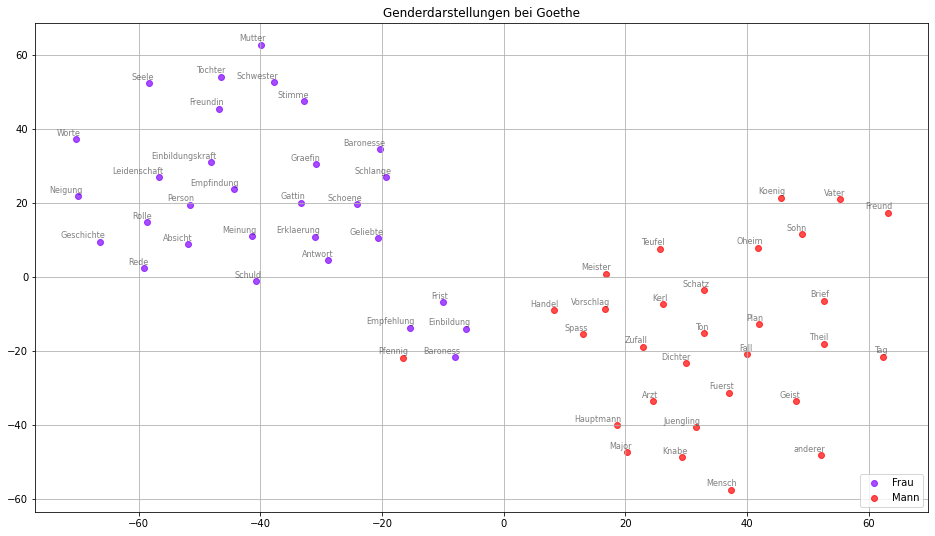

In [45]:
import gensim

keys = ['Frau', 'Mann']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)
    
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Genderdarstellungen bei Goethe', keys, embeddings_en_2d, word_clusters, 0.7,
                        'Gender_Goethe.png')

<div class="alert alert-block alert-info">
<b>Aufgabe:</b> Schauen Sie sich die Visualsierung der semantischen Felder der Wörter "Frau" und "Mann" an. Ist die Zuweisung, die im word2vec-Modell festgelegt ist akkurat?
</div>

## Eigene Abfragen erstellen

Sie kennen nun einige grundlegende Aspekte des Workflows der word2vec-Methode. Auf Basis dieses Ablaufs können Sie nun eigene Daten nutzen und eigene Abfragen erstellen. Ändern Sie einfach den Dateipfad in Schritt 3, um ein eigenes Korpus zu einem word2vec-Modell umrechnen zu lassen. Tauschen Sie die Begriffe in den Abfragen durch solche aus, die Sie interessieren. In der zuletzt angelegten Visualisierung können Sie die Begriffe in der Zeile

<div class="alert alert-block alert-warning">
keys = ['Frau', 'Mann']
</div>

austauschen. Außerdem können Sie in der letzten Zeile den Titel der Visualisierung und den Dateinamen zum Abspeichern verändern. Klicken Sie dazu einfach in die Box, markieren die Textstelle, die sie austauschen wollen und geben Sie etwas Neues ein.

## Schlussbemerkungen

In dieser Lerneinheit haben wir ein word2vec-Modell anhand eines relativ kleinen Korpus (Goethes Prosatexte und Dramen, insgesamt 45 Werke) trainiert, Abfragen erstellt und Visualisierungen angefertigt. Solche Modelle nehmen deutlich an Qualität zu, wenn größere Datenmengen zugrunde gelegt werden. Mehr über die methodischen Grundlagen erfahren Sie in unserem Methodenbeitrag word2vec (Schumacher und Uglanova 2022: https://fortext.net/routinen/methoden/word2vec). 

Die Lösungen zu den hier aufgeführten Beispielaufgaben sowie Hinweise dazu, wie Sie ein Korpus vorbereiten sollten, wenn Sie es für word2vec mit Gensim nutzen wollen, finden Sie in unserer word2vec-Lerneinheit (Schumacher 2022: https://fortext.net/routinen/lerneinheiten/word2vec-mit-gensim).